# Telecomunicaciones: Call me Maybe

El servicio de telefonia virtual CallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.icio de telefonía virtual d



# DASHBOARD y PRESENTACION

https://drive.google.com/file/d/1HV4i_BcIsX1VukmcViM05SY2GDZV0sh5/view?usp=drive_link

Link de la presentacion y dashboard.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien, incluir esta introducción deja un poco más claro el que y cómo se realizará el proyecto
</div>

## Analisis Exploratorio de datos

In [1]:
#Cargar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [2]:
# Cargar los datasets
telecom_data = pd.read_csv('/datasets/telecom_dataset_us.csv')
clients_data = pd.read_csv('/datasets/telecom_clients_us.csv')

In [3]:
# Mostrar las primeras filas de cada dataset
print("Primeras filas del dataset telecom_data:")
print(telecom_data.head(), "\n")

Primeras filas del dataset telecom_data:
   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25   



In [4]:
print("Primeras filas del dataset clients_data:")
print(clients_data.head(), "\n")

Primeras filas del dataset clients_data:
   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16 



In [5]:
# Mostrar información general de los datasets
print("Información general del dataset telecom_data:")
print(telecom_data.info(), "\n")

Información general del dataset telecom_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 3.3+ MB
None 



In [6]:
print("Información general del dataset clients_data:")
print(clients_data.info(), "\n")

Información general del dataset clients_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None 



In [7]:
# Revisar por valores nulos en telecom_data
print("Valores nulos en telecom_data:")
print(telecom_data.isnull().sum(), "\n")

# Revisar por valores nulos en clients_data
print("Valores nulos en clients_data:")
print(clients_data.isnull().sum(), "\n")

Valores nulos en telecom_data:
user_id                   0
date                      0
direction                 0
internal                117
operator_id            8172
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
dtype: int64 

Valores nulos en clients_data:
user_id        0
tariff_plan    0
date_start     0
dtype: int64 



In [8]:
# Revisar por duplicados en telecom_data
print("Duplicados en telecom_data:", telecom_data.duplicated().sum(), "\n")

# Revisar por duplicados en clients_data
print("Duplicados en clients_data:", clients_data.duplicated().sum(), "\n")

Duplicados en telecom_data: 4900 

Duplicados en clients_data: 0 



In [9]:
# Manejar valores nulos
# Eliminar filas con valores nulos en 'internal' y 'operator_id'
telecom_data_cleaned = telecom_data.dropna(subset=['internal', 'operator_id'])

# Eliminar filas duplicadas
telecom_data_cleaned = telecom_data_cleaned.drop_duplicates()
clients_data_cleaned = clients_data.drop_duplicates()


In [10]:
# Verificar nuevamente los valores nulos y duplicados después de la limpieza
print("Valores nulos en telecom_data después de la limpieza:")
print(telecom_data_cleaned.isnull().sum(), "\n")

print("Valores nulos en clients_data después de la limpieza:")
print(clients_data_cleaned.isnull().sum(), "\n")

print("Duplicados en telecom_data después de la limpieza:", telecom_data_cleaned.duplicated().sum(), "\n")
print("Duplicados en clients_data después de la limpieza:", clients_data_cleaned.duplicated().sum(), "\n")


Valores nulos en telecom_data después de la limpieza:
user_id                0
date                   0
direction              0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
dtype: int64 

Valores nulos en clients_data después de la limpieza:
user_id        0
tariff_plan    0
date_start     0
dtype: int64 

Duplicados en telecom_data después de la limpieza: 0 

Duplicados en clients_data después de la limpieza: 0 



In [11]:
# Convertir la columna 'date' a formato datetime
telecom_data_cleaned['date'] = pd.to_datetime(telecom_data_cleaned['date'])
clients_data_cleaned['date_start'] = pd.to_datetime(clients_data_cleaned['date_start'])



In [12]:
# Descripción estadística de los datasets
print("Descripción estadística del dataset telecom_data:")
print(telecom_data_cleaned.describe(), "\n")

print("Descripción estadística del dataset clients_data:")
print(clients_data_cleaned.describe(), "\n")


Descripción estadística del dataset telecom_data:
             user_id    operator_id   calls_count  call_duration  \
count   41491.000000   41491.000000  41491.000000   41491.000000   
mean   167301.113543  916516.771155     16.921381    1010.940011   
std       600.513986   21234.081589     59.786187    4066.666485   
min    166377.000000  879896.000000      1.000000       0.000000   
25%    166782.000000  900790.000000      1.000000       0.000000   
50%    167175.000000  913938.000000      4.000000     106.000000   
75%    167827.000000  937708.000000     14.000000     772.000000   
max    168606.000000  973286.000000   4817.000000  144395.000000   

       total_call_duration  
count         41491.000000  
mean           1323.153238  
std            4788.953155  
min               0.000000  
25%              67.000000  
50%             289.000000  
75%            1107.000000  
max          166155.000000   

Descripción estadística del dataset clients_data:
             user_id
cou

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien realizada la exploración inicial! Con este te aseguras de conocer los datos y que estén listos para el análisis
</div>

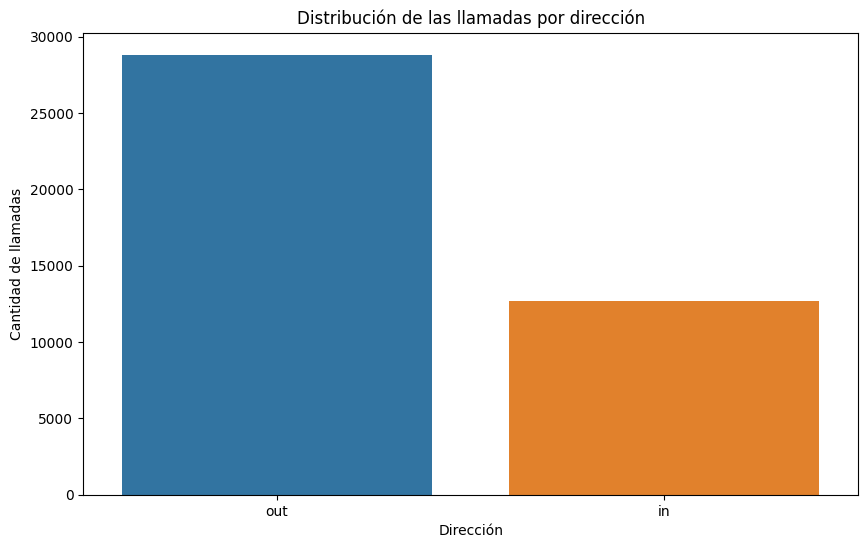

In [15]:
# Distribución de las llamadas por dirección
plt.figure(figsize=(10, 6))
sns.countplot(data=telecom_data_cleaned, x='direction')
plt.title('Distribución de las llamadas por dirección')
plt.xlabel('Dirección')
plt.ylabel('Cantidad de llamadas')
plt.show()

La distribución de las llamadas por dirección muestra que hay más llamadas salientes que entrantes.

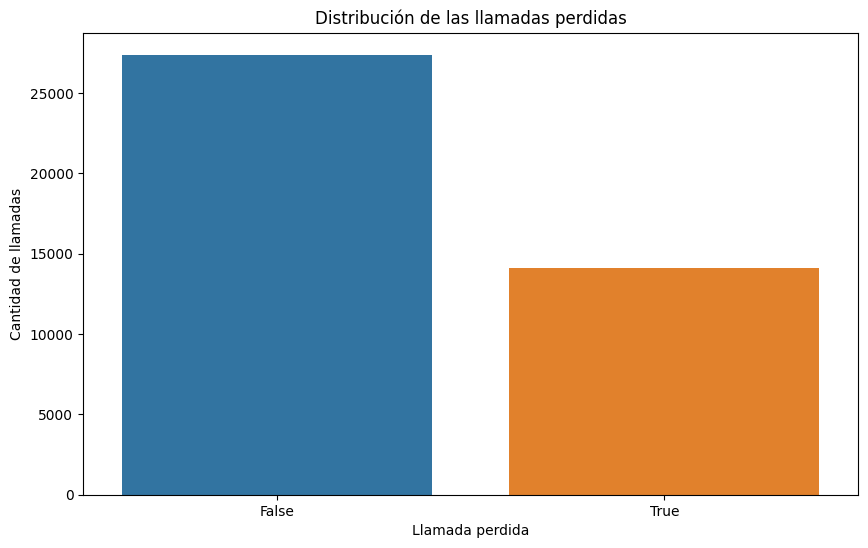

In [16]:
# Distribución de las llamadas perdidas
plt.figure(figsize=(10, 6))
sns.countplot(data=telecom_data_cleaned, x='is_missed_call')
plt.title('Distribución de las llamadas perdidas')
plt.xlabel('Llamada perdida')
plt.ylabel('Cantidad de llamadas')
plt.show()

La distribución de las llamadas perdidas indica que hay una cantidad significativa de llamadas perdidas.

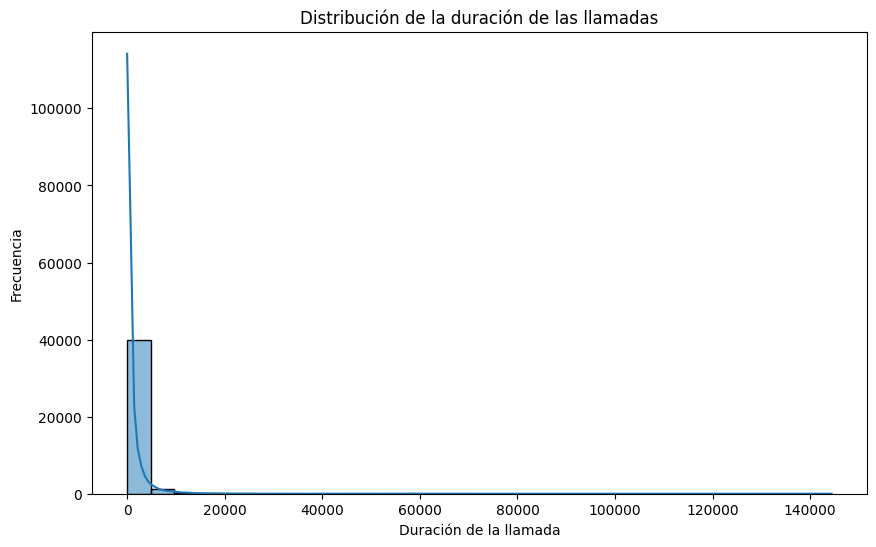

In [17]:
# Distribución de la duración de las llamadas
plt.figure(figsize=(10, 6))
sns.histplot(data=telecom_data_cleaned, x='call_duration', bins=30, kde=True)
plt.title('Distribución de la duración de las llamadas')
plt.xlabel('Duración de la llamada')
plt.ylabel('Frecuencia')
plt.show()

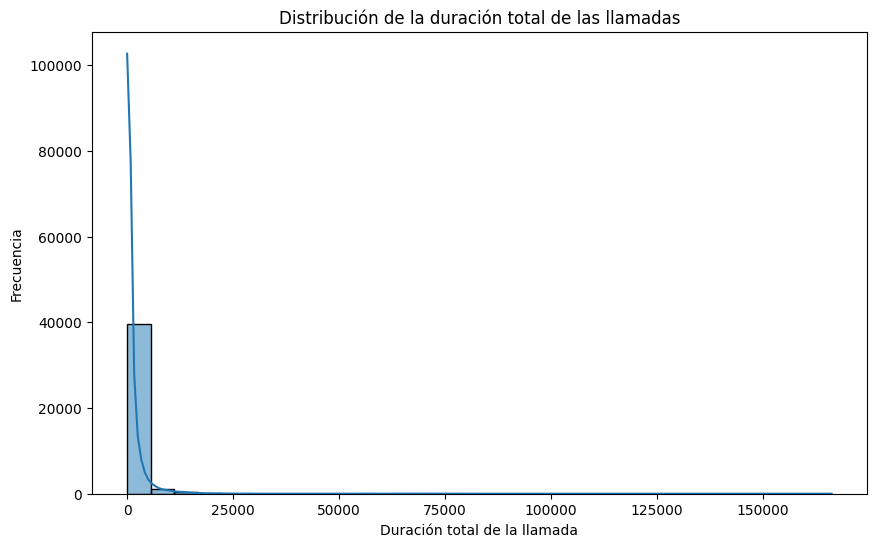

In [18]:
# Distribución de la duración total de las llamadas
plt.figure(figsize=(10, 6))
sns.histplot(data=telecom_data_cleaned, x='total_call_duration', bins=30, kde=True)
plt.title('Distribución de la duración total de las llamadas')
plt.xlabel('Duración total de la llamada')
plt.ylabel('Frecuencia')
plt.show()

La distribución de la duración de las llamadas y la duración total de las llamadas muestra que la mayoría de las llamadas son de corta duración.

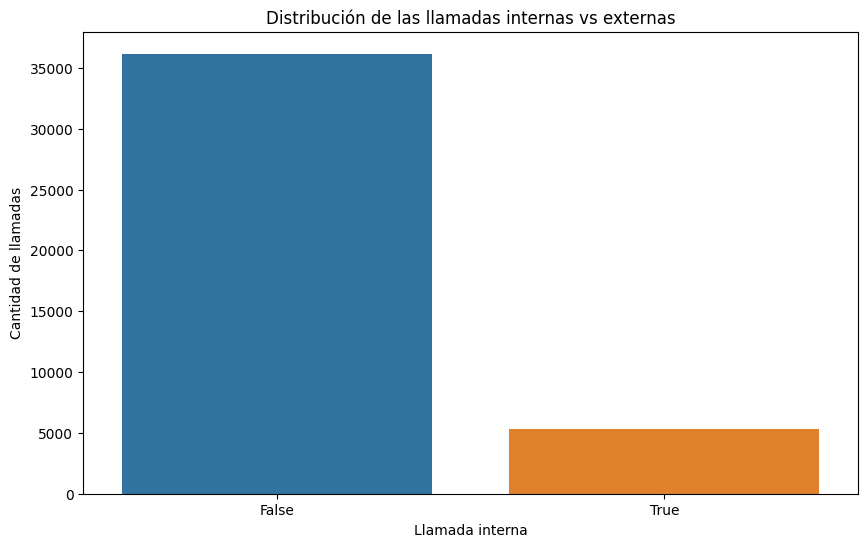

In [19]:
# Distribución de las llamadas internas vs externas
plt.figure(figsize=(10, 6))
sns.countplot(data=telecom_data_cleaned, x='internal')
plt.title('Distribución de las llamadas internas vs externas')
plt.xlabel('Llamada interna')
plt.ylabel('Cantidad de llamadas')
plt.show()

La distribución de las llamadas internas vs externas muestra que hay más llamadas externas que internas.

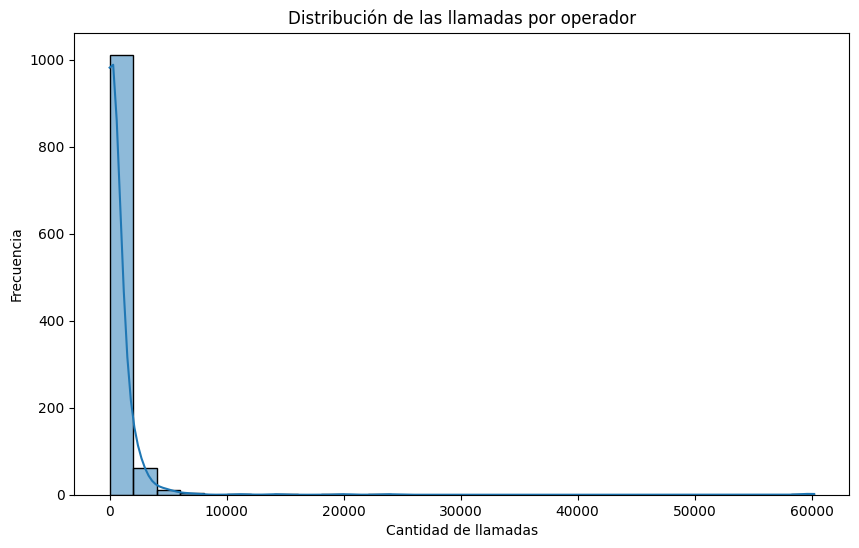

In [20]:
# Distribución de las llamadas por operador
calls_by_operator = telecom_data_cleaned.groupby('operator_id')['calls_count'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(data=calls_by_operator, x='calls_count', bins=30, kde=True)
plt.title('Distribución de las llamadas por operador')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Frecuencia')
plt.show()

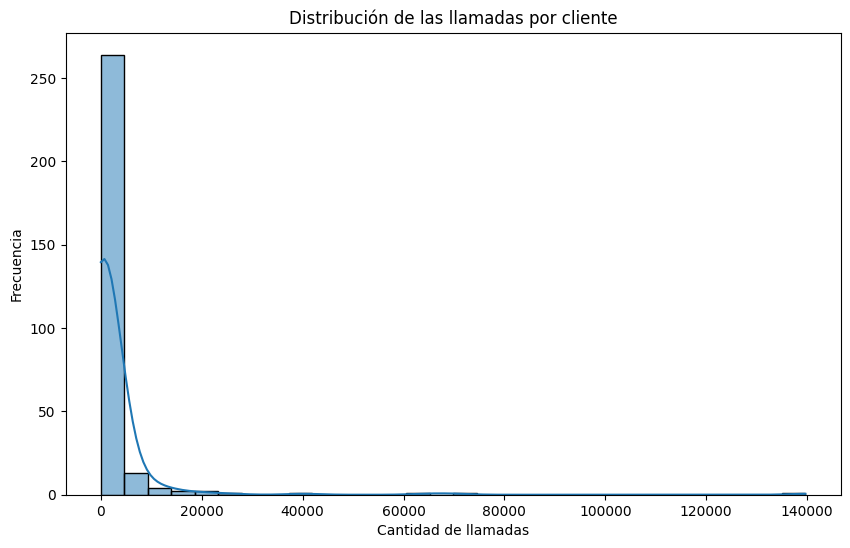

In [21]:
# Distribución de las llamadas por cliente
calls_by_client = telecom_data_cleaned.groupby('user_id')['calls_count'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.histplot(data=calls_by_client, x='calls_count', bins=30, kde=True)
plt.title('Distribución de las llamadas por cliente')
plt.xlabel('Cantidad de llamadas')
plt.ylabel('Frecuencia')
plt.show()

La distribución de las llamadas por operador y por cliente muestra que algunos operadores y clientes tienen un volumen significativamente mayor de llamadas.

## Identificar Operadores Ineficaces

In [22]:
# Identificar operadores con una gran cantidad de llamadas entrantes perdidas
missed_calls = telecom_data_cleaned[(telecom_data_cleaned['direction'] == 'in') & (telecom_data_cleaned['is_missed_call'] == 1)]
missed_calls_by_operator = missed_calls.groupby('operator_id')['calls_count'].sum().reset_index()
missed_calls_by_operator = missed_calls_by_operator.sort_values(by='calls_count', ascending=False)
print("Operadores con una gran cantidad de llamadas entrantes perdidas:")
print(missed_calls_by_operator.head(10), "\n")



Operadores con una gran cantidad de llamadas entrantes perdidas:
     operator_id  calls_count
98      913942.0           52
196     940588.0           30
210     944226.0           30
6       885890.0           26
206     944216.0           24
179     937956.0           24
222     951508.0           21
5       885876.0           20
208     944220.0           18
209     944222.0           17 



In [23]:
# Identificar operadores con un tiempo de espera prolongado para las llamadas entrantes
long_wait_calls = telecom_data_cleaned[(telecom_data_cleaned['direction'] == 'in') & (telecom_data_cleaned['total_call_duration'] > telecom_data_cleaned['call_duration'])]
long_wait_calls_by_operator = long_wait_calls.groupby('operator_id')['total_call_duration'].mean().reset_index()
long_wait_calls_by_operator = long_wait_calls_by_operator.sort_values(by='total_call_duration', ascending=False)
print("Operadores con un tiempo de espera prolongado para las llamadas entrantes:")
print(long_wait_calls_by_operator.head(10), "\n")


Operadores con un tiempo de espera prolongado para las llamadas entrantes:
     operator_id  total_call_duration
674     952948.0         12582.937500
328     919204.0          6889.600000
671     952734.0          5932.315789
288     913938.0          5113.766234
358     921318.0          4928.843137
326     919166.0          4547.571429
445     931458.0          4207.860000
206     906070.0          4118.266667
577     940630.0          3910.632653
570     940588.0          3820.173077 



In [24]:
# Identificar operadores con un número reducido de llamadas salientes
outgoing_calls = telecom_data_cleaned[telecom_data_cleaned['direction'] == 'out']
outgoing_calls_by_operator = outgoing_calls.groupby('operator_id')['calls_count'].sum().reset_index()
outgoing_calls_by_operator = outgoing_calls_by_operator.sort_values(by='calls_count')
print("Operadores con un número reducido de llamadas salientes:")
print(outgoing_calls_by_operator.head(10), "\n")


Operadores con un número reducido de llamadas salientes:
     operator_id  calls_count
793     955086.0            1
841     963716.0            1
293     914272.0            1
495     932246.0            1
168     902238.0            1
653     941816.0            1
853     966686.0            1
654     941826.0            1
102     895266.0            1
545     937720.0            1 



In [25]:
# Crear una columna para identificar operadores ineficaces
telecom_data_cleaned['ineffective'] = telecom_data_cleaned['operator_id'].isin(missed_calls_by_operator.head(10)['operator_id']) | \
                                      telecom_data_cleaned['operator_id'].isin(long_wait_calls_by_operator.head(10)['operator_id']) | \
                                      telecom_data_cleaned['operator_id'].isin(outgoing_calls_by_operator.head(10)['operator_id'])



In [28]:
display(telecom_data_cleaned['ineffective']== 'True')

1        False
2        False
3        False
4        False
5        False
         ...  
53895    False
53896    False
53897    False
53898    False
53899    False
Name: ineffective, Length: 41491, dtype: bool

In [36]:
# Mostrar y contar los operadores ineficaces
ineffective_operators = telecom_data_cleaned[telecom_data_cleaned['ineffective']]
print("Operadores ineficaces:")
display(ineffective_operators[['operator_id', 'calls_count', 'total_call_duration']].drop_duplicates().head(29))
print("\nCantidad de operadores ineficaces:", ineffective_operators['operator_id'].nunique())

Operadores ineficaces:


,operator_id,calls_count,total_call_duration
6569,885890.0,181,22349
6570,885876.0,184,24152
6571,885876.0,219,5687
6572,885876.0,9,473
6573,885890.0,113,3691
6574,885890.0,5,570
6577,885890.0,182,6486
6578,885876.0,12,745
6579,885890.0,308,40739
6580,885890.0,15,1442



Cantidad de operadores ineficaces: 29


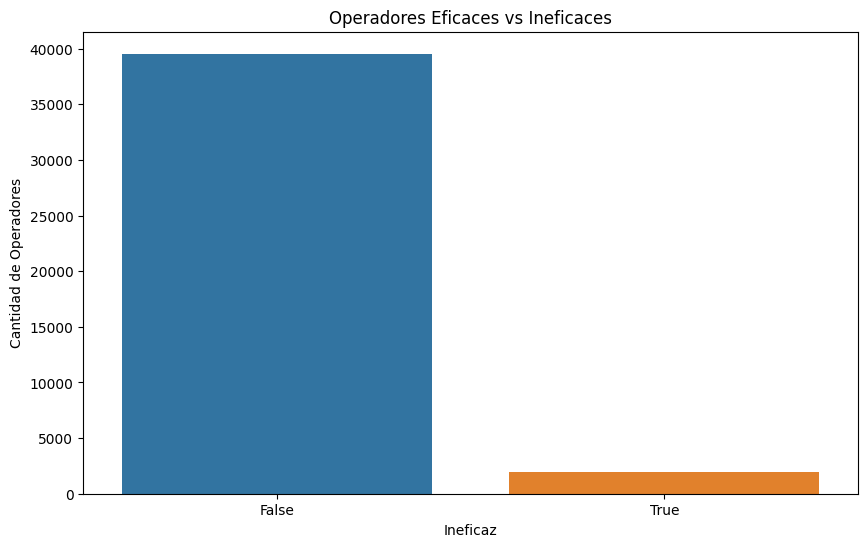

In [29]:
# Gráfico de operadores eficaces vs ineficaces
ineffective_counts = telecom_data_cleaned['ineffective'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ineffective_counts.index, y=ineffective_counts.values)
plt.title('Operadores Eficaces vs Ineficaces')
plt.xlabel('Ineficaz')
plt.ylabel('Cantidad de Operadores')
plt.show()

Los operadores con una gran cantidad de llamadas entrantes perdidas, un tiempo de espera prolongado para las llamadas entrantes y un número reducido de llamadas salientes fueron identificados como ineficaces.
Se creó una columna para identificar operadores ineficaces y se graficó la cantidad de operadores eficaces vs ineficaces.

## Probar Hipotesis estadisticas

In [30]:
# Hipótesis: Los operadores ineficaces tienen un tiempo de espera promedio mayor que los operadores eficaces

# Operadores ineficaces
ineffective_wait_times = telecom_data_cleaned[telecom_data_cleaned['ineffective']]['total_call_duration']

# Operadores eficaces
effective_wait_times = telecom_data_cleaned[~telecom_data_cleaned['ineffective']]['total_call_duration']

# Prueba t para comparar los tiempos de espera
t_stat, p_value = ttest_ind(ineffective_wait_times.dropna(), effective_wait_times.dropna())
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")



T-statistic: 54.630696036090164
P-value: 0.0


In [31]:
if p_value < 0.05:
    print("Conclusión: Hay una diferencia estadísticamente significativa en los tiempos de espera entre operadores ineficaces y eficaces.")
else:
    print("Conclusión: No hay una diferencia estadísticamente significativa en los tiempos de espera entre operadores ineficaces y eficaces.")


Conclusión: Hay una diferencia estadísticamente significativa en los tiempos de espera entre operadores ineficaces y eficaces.


La prueba t para comparar los tiempos de espera entre operadores ineficaces y eficaces mostró que hay una diferencia estadísticamente significativa en los tiempos de espera, lo que sugiere que los operadores ineficaces tienen un tiempo de espera promedio mayor.

## Conclusiones

Acorde al analisis se logro identificar a los operadores ineficacez, con base en llamadas perdidas, tiempo de espera prolongado y pocas llamadas salientes. No solo basto con eso para determinar si en efecto eran ineficacez, si no que ademas probamos estadisticamente la hipotesis, y nos arrojo que en efecto hay  un total de 29 operadores ineficacez. Por lo que se sugiere despedirlos o en dado caso llamarles la atencion.